In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Malaria-Detection-master.zip","r") as files:
  files.extractall("malariadataset")


In [4]:
import zipfile
with zipfile.ZipFile("/content/malariadataset/Malaria-Detection-master/Dataset.zip","r") as files:
  files.extractall("dataset")

In [5]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

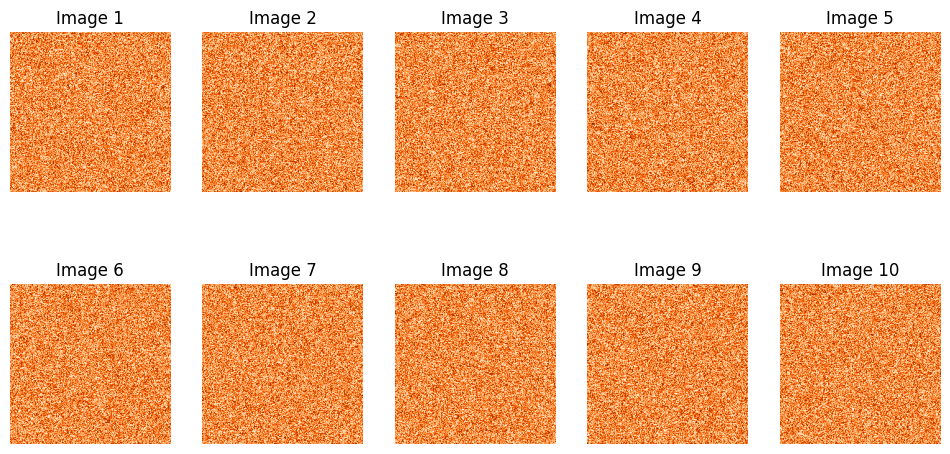

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random synthetic image data (you would replace this with loading images from your dataset)
# This code generates 10 random 64x64 grayscale images.
num_images = 10
image_size = (224, 224)

# Create an empty list to store the images
images = []

for _ in range(num_images):
    # Generate random pixel values for the image
    random_image = np.random.rand(*image_size)

    # Append the random image to the list
    images.append(random_image)

# Display random images
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='Oranges')
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()


In [13]:
from PIL import Image
import os

# Directory containing your dataset images
input_dir = "/content/dataset/Dataset/Train"
output_dir = "/content/dataset/Dataset/Train"  # The resized images will be saved here

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the new dimensions (width, height)
new_width = 224
new_height = 224

# Loop through the images in the input directory and resize each one
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Consider only image files
        # Open the image
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)

        # Resize the image
        resized_image = image.resize((new_width, new_height))

        # Save the resized image to the output directory
        output_path = os.path.join(output_dir, filename)
        resized_image.save(output_path)

print("Resizing complete.")


Resizing complete.


In [14]:
from PIL import Image
import os

# Directory containing your dataset images
input_dir = "/content/dataset/Dataset/Test"
output_dir = "/content/dataset/Dataset/Test"  # The resized images will be saved here

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the new dimensions (width, height)
new_width = 224
new_height = 224

# Loop through the images in the input directory and resize each one
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Consider only image files
        # Open the image
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)

        # Resize the image
        resized_image = image.resize((new_width, new_height))

        # Save the resized image to the output directory
        output_path = os.path.join(output_dir, filename)
        resized_image.save(output_path)

print("Resizing complete.")

Resizing complete.


In [15]:
import cv2
import os

# Directory containing your dataset images
input_dir = "/content/dataset/Dataset/Train"
output_dir = "/content/dataset/Dataset/Train"  # The normalized images will be saved here

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through the images in the input directory and normalize each one
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Consider only image files
        # Open the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

        # Normalize the image (min-max scaling)
        min_val = image.min()
        max_val = image.max()
        normalized_image = (image - min_val) / (max_val - min_val)

        # Optionally, you can scale to a different range, e.g., [-1, 1]
        normalized_image = 2 * normalized_image - 1

        # Save the normalized image to the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, (normalized_image * 255).astype(int))  # Scale back to 0-255 range for saving

print("Normalization complete.")


Normalization complete.


In [16]:
import cv2
import os

# Directory containing your dataset images
input_dir = "/content/dataset/Dataset/Test"
output_dir = "/content/dataset/Dataset/Test"  # The normalized images will be saved here

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through the images in the input directory and normalize each one
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Consider only image files
        # Open the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

        # Normalize the image (min-max scaling)
        min_val = image.min()
        max_val = image.max()
        normalized_image = (image - min_val) / (max_val - min_val)

        # Optionally, you can scale to a different range, e.g., [-1, 1]
        normalized_image = 2 * normalized_image - 1

        # Save the normalized image to the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, (normalized_image * 255).astype(int))  # Scale back to 0-255 range for saving

print("Normalization complete.")


Normalization complete.


In [17]:



import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Generate or load your dataset as a NumPy array
# For demonstration, we'll create a random dataset
data = np.random.rand(100, 3)  # 100 samples with 3 features

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(data)

# Iterate through and print the normalized data
for sample in normalized_data:
    print(sample)


[0.62924989 0.65483906 0.88719229]
[0.91375246 0.15607359 0.78481097]
[0.6247034  0.53449744 0.90393773]
[0.28809576 0.71481124 0.78200606]
[0.4821475  0.70223607 0.27591171]
[0.10617015 0.80403781 0.23484996]
[0.60946269 0.17839241 0.17109575]
[0.06474754 0.02993558 0.15043071]
[0.79355328 0.38316597 0.92942958]
[0.46890537 0.98164079 0.47165921]
[0.24369758 0.02215838 0.47402663]
[0.33417551 0.25750211 0.96495061]
[0.50002808 0.29854426 0.33583528]
[0.14912878 0.35381976 0.89780628]
[0.45102866 0.07745646 0.17414044]
[0.69605396 0.34647425 0.68865208]
[0.2496512  0.48255807 0.32976336]
[0.68122396 0.24403263 0.87330023]
[0.89858635 0.43523398 0.94942658]
[0.97913905 0.12980152 0.28943504]
[0.25945258 0.87091408 0.73957869]
[0.48040203 0.16907875 0.41056354]
[0.097551   0.57244033 0.62415849]
[0.30123317 0.73109743 0.12347242]
[0.86277732 0.72589919 0.4317214 ]
[0.91092752 0.96501951 0.4442167 ]
[0.88651751 0.91915878 0.96472389]
[0.10858517 0.         0.89936672]
[0.889974   0.446506

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

# Directory containing your original dataset
input_dir = "/content/dataset/Dataset/Train"
output_dir = "/content/dataset/Dataset/Train"  # Augmented images will be saved here

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create an ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate through the images in the input directory, augment them, and save to the output directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Consider only image files
        # Load the image
        image_path = os.path.join(input_dir, filename)
        img = image.load_img(image_path)
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate and save augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= 3:  # Adjust the number of augmented images generated per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [19]:
IMAGE_SIZE = [224, 224]

train_path = '/content/dataset/Dataset/Train'
valid_path = '/content/dataset/Dataset/Test'

In [20]:
train_path

'/content/dataset/Dataset/Train'

In [21]:
train_datagen = ImageDataGenerator(
                 rescale=1./255,
                 shear_range=0.2,
                 zoom_range=0.2,
                 horizontal_flip=True)
train="/content/dataset/Dataset/Train"
training_set=train_datagen.flow_from_directory(train,target_size=(224,224),
                                               batch_size=32,shuffle=True,class_mode="categorical")

Found 416 images belonging to 2 classes.


In [22]:
test="/content/dataset/Dataset/Test"
test_datagen = ImageDataGenerator(
                 rescale=1./255)
test_set=train_datagen.flow_from_directory(test,target_size=(224,224),
                                               batch_size=16,shuffle=False,class_mode="categorical")

Found 134 images belonging to 2 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model=tf.keras.Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [27]:
history=model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
13/13 [==============================] - 20s 658ms/step - loss: 0.6764 - accuracy: 0.5457 - val_loss: 0.7195 - val_accuracy: 0.4104
Epoch 2/25
13/13 [==============================] - 6s 479ms/step - loss: 0.6123 - accuracy: 0.6562 - val_loss: 0.7323 - val_accuracy: 0.3806
Epoch 3/25
13/13 [==============================] - 9s 747ms/step - loss: 0.4960 - accuracy: 0.7548 - val_loss: 0.8482 - val_accuracy: 0.4030
Epoch 4/25
13/13 [==============================] - 6s 461ms/step - loss: 0.4221 - accuracy: 0.7812 - val_loss: 0.9166 - val_accuracy: 0.3657
Epoch 5/25
13/13 [==============================] - 9s 737ms/step - loss: 0.3854 - accuracy: 0.8197 - val_loss: 0.9265 - val_accuracy: 0.4030
Epoch 6/25
13/13 [==============================] - 6s 464ms/step - loss: 0.3903 - accuracy: 0.8005 - val_loss: 1.0560 - val_accuracy: 0.4030
Epoch 7/25
13/13 [==============================] - 9s 742ms/step - loss: 0.3495 - accuracy: 0.8341 - val_loss: 0.6637 - val_accuracy: 0.6343
Epoch

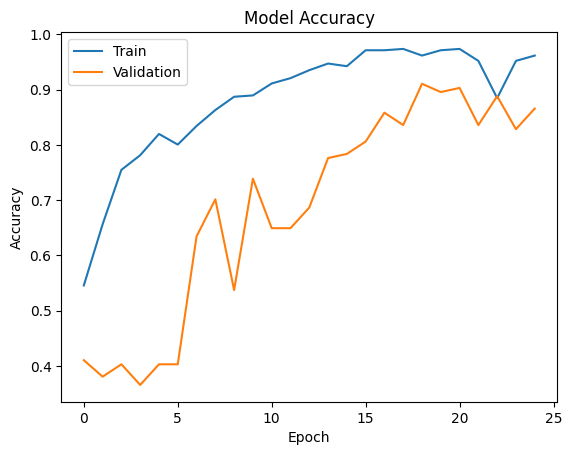

In [29]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'history' contains the history object from model.fit()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


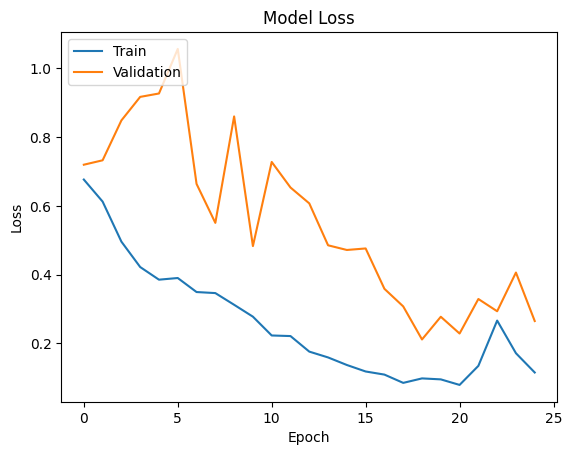

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
training_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = image.load_img('/content/dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png',
                            target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result=model.predict(test_image)
training_set.class_indices
print(result)

1/1 [==============================] - 0s 168ms/step
[[1. 0.]]


In [33]:
if result[0][0] == 1:
  print('Infected Cell')
else:
  print('Uninfected cell')

Infected Cell


In [34]:
train

'/content/dataset/Dataset/Train'

1/1 [==============================] - 0s 21ms/step


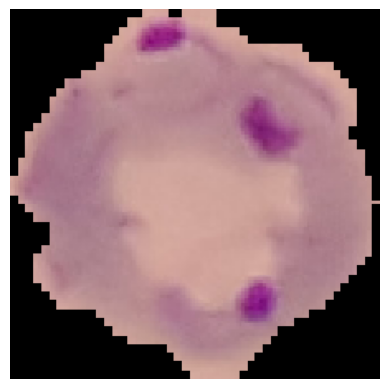

Predicted class: Parasite, Probability: 1.0


In [35]:

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image using Keras preprocessing
test_image = image.load_img('/content/dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png',
                            target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the prediction result from the model
result = model.predict(test_image)

# Define the class indices from the training set
class_indices = {'Parasite': 0, 'Uninfected': 1 } # Update with your class indices

# Display the image
plt.imshow(test_image[0].astype(np.uint8))  # Show the image
plt.axis('off')  # Hide axis labels
plt.show()

# Display the prediction result
predicted_class = np.argmax(result)
for class_name, index in class_indices.items():
    if index == predicted_class:
        print(f"Predicted class: {class_name}, Probability: {result[0][predicted_class]}")


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [37]:
num_classes=2
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(num_classes))

In [38]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               262272    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 258       
 apper)                                                          
                                                                 
Total params: 23850242 (90.98 MB)
Trainable params: 262530 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [39]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [41]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [42]:

training_set = train_datagen.flow_from_directory(
    '/content/dataset/Dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # or 'binary' depending on your problem
)

Found 416 images belonging to 2 classes.


In [43]:
test_set = test_datagen.flow_from_directory(
    '/content/dataset/Dataset/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # or 'binary' depending on your problem
)

Found 134 images belonging to 2 classes.


In [44]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [45]:
NUM_CLASSES = 2  # Replace 10 with the actual number of classes in your dataset


In [46]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

In [47]:
resnet_model = Model(inputs=base_model.input, outputs=predictions)

In [48]:
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
epochs = 10
history = resnet_model.fit(
    training_set,
    epochs=epochs,
    validation_data=test_set
)

Epoch 1/10
13/13 [==============================] - 42s 556ms/step - loss: 0.9556 - accuracy: 0.8726 - val_loss: 46257.4531 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 5s 376ms/step - loss: 0.0340 - accuracy: 0.9928 - val_loss: 277.0656 - val_accuracy: 0.6791
Epoch 3/10
13/13 [==============================] - 5s 378ms/step - loss: 0.3310 - accuracy: 0.9231 - val_loss: 19592558.0000 - val_accuracy: 0.6791
Epoch 4/10
13/13 [==============================] - 5s 402ms/step - loss: 0.1343 - accuracy: 0.9567 - val_loss: 1493.6415 - val_accuracy: 0.6791
Epoch 5/10
13/13 [==============================] - 5s 382ms/step - loss: 0.0908 - accuracy: 0.9712 - val_loss: 14.9623 - val_accuracy: 0.6791
Epoch 6/10
13/13 [==============================] - 5s 400ms/step - loss: 0.0744 - accuracy: 0.9880 - val_loss: 17.6773 - val_accuracy: 0.3209
Epoch 7/10
13/13 [==============================] - 5s 387ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 95.1711 - val_acc

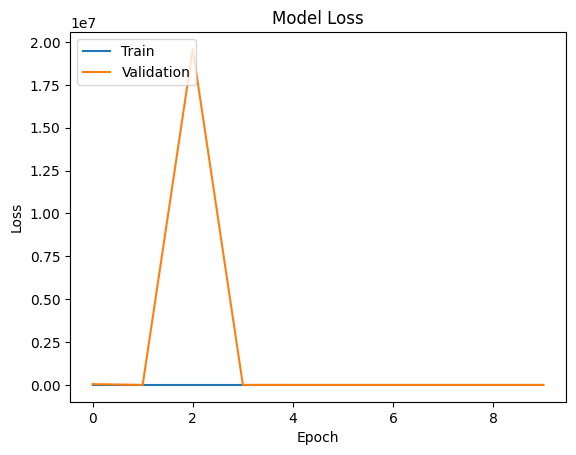

In [50]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

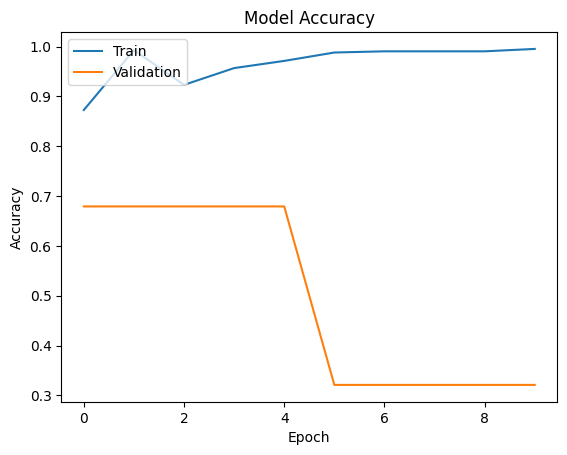

In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'history' contains the history object from model.fit()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


13/13 [==============================] - 1s 77ms/step
